In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# make you sure to fix pseudorandom seeds for reproducibility!
print(tf.__version__)
np.random.seed(420) 
tf.random.set_seed(420)

2.4.1


In [23]:
mnist_data = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_data.load_data()

Let's take a quick look on data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape


(60000,)

In [5]:
# np.unique(y_train) # 10 class classification problem

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Show some examples

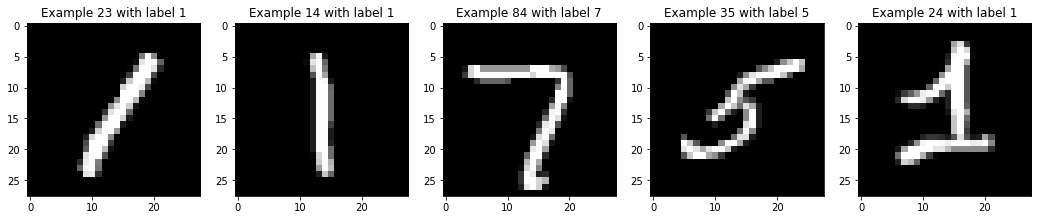

In [8]:
n_examples = 5
fig, axes = plt.subplots(ncols=n_examples, figsize=(18,15))

for ax, idx in zip(axes, np.random.randint(0,100,n_examples)): # show randomly picked training examples
  ax.imshow(X_train[idx], cmap='gray')
  ax.set_title("Example {} with label {}".format(idx,y_train[idx]))


## Model Specs

Let's build our MLP NN. Make you sure to preprocess your data, in this case normalize images from uint8 (range 0-255) to float32  (range 0-1)

The model building process can be conceptually divided into 2 stage:

* model specification: define the overall architecture (number and type of layers, activation functions, etc.)

* model compilation: choose the optimizer, loss functions and performance metrics.




In [ ]:
#@title
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [31]:
#@title
def get_mlp_model():# specification
  model = keras.models.Sequential() # just a simple feedforward NN

  model.add(keras.layers.Flatten()) # add the input layer, automatically flatten out the images
  model.add(keras.layers.Dense(128,activation=tf.nn.relu)) # add a dense layer with 128 units
  model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) # add an output layer, one unit for each class
  

  # compilation

  model.compile(optimizer=tf.optimizers.Adam(), 
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  return model

In [24]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [25]:
 model = keras.models.Sequential() # just a simple feedforward NN

model.add(keras.layers.Flatten()) # add the input layer, automatically flatten out the images
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) # add a dense layer with 128 units
model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) # add an output layer, one unit for each class


# compilation

model.compile(optimizer=tf.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1273 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0818 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9866


In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9783


[0.07298523187637329, 0.9782999753952026]

In [27]:
import numpy as np
import scipy as sc

AttributeError: ignored

## Model Training

In [32]:
# training 
model = get_mlp_model()

history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1221 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9877


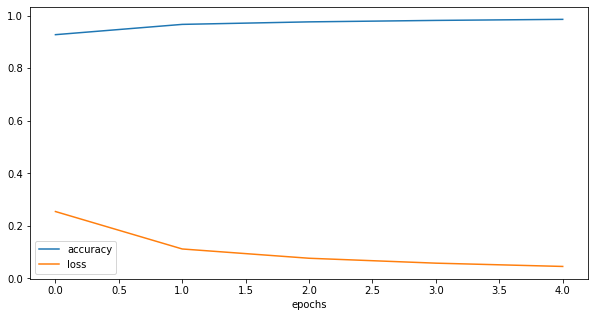

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history.epoch, history.history['accuracy'], label='accuracy')
ax.plot(history.epoch, history.history['loss'], label='loss')
ax.set_xlabel('epochs')
ax.legend()

In [ ]:
model.evaluate(X_test,y_test)

## An harder problem

Mnist dataset is the "hello world" of NN. Let's try with less easy data: *FashionMnist* dataset



In [34]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


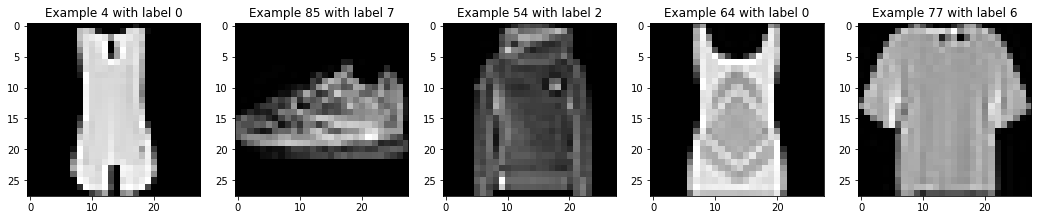

In [35]:
n_examples = 5
fig, axes = plt.subplots(ncols=n_examples, figsize=(18,15))

for ax, idx in zip(axes, np.random.randint(0,100,n_examples)): # show randomly picked training examples
  ax.imshow(X_train[idx], cmap='gray')
  ax.set_title("Example {} with label {}".format(idx,y_train[idx]))

In [36]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [37]:
model = get_mlp_model() 
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6294 - accuracy: 0.7870
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3918 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3014 - accuracy: 0.8899


In [ ]:
model.evaluate(X_test, y_test)

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_8 (Dense)              (32, 128)                 100480    
_________________________________________________________________
dense_9 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
785*128

100480